# README

This notebook is a part of the reproducibility repository for the paper "Cohort-level analysis of human de novo mutations points to drivers of clonal expansion in spermatogonia." The notebook contains a population-genetics test for validating CES candidates based on the mean and variance estimates of an SFS.

# Dependencies
The following Python libraries are required for this notebook:

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical computations.
- `matplotlib.pyplot`: For creating plots and visualizations.
- `scipy.stats`: For statistical distributions and tests.
- `scipy.special`: For special mathematical functions like gamma.
- `scipy.integrate`: For numerical integration.
- `gzip`: For handling compressed files.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm, nbinom, poisson, linregress
from scipy.special import gamma
from scipy.integrate import quad


In [14]:
# File containing population LoF allele frequencies
LoF_freqs_file = "all_Lof_Gnomad_gene_v4_all.txt"

# ENSEMBL ID to Gene ID mapping
ENS2Gene_file = "ENS_ID2Gene_ID.txt.gz"

In [15]:
df = pd.read_csv(LoF_freqs_file, header = None, sep=' ')

df[1] = df[1]*4e-9/(np.mean(df[1]))
ENS_IDs = list(set(df[0]))


In [ ]:
ENS2Gene_file = "ENS2Gene_file"
edf = pd.read_table(ENS2Gene_file, header = None, compression='gzip')
ENS2Gene = {edf[0][i] : edf[1][i] for i in range(edf.shape[0])}

In [16]:
CES_ENS = [
    'ENSG00000169855', 'ENSG00000176165', 'ENSG00000157540', 'ENSG00000168036', 
    'ENSG00000185129', 'ENSG00000049618', 'ENSG00000064419', 'ENSG00000101752', 
    'ENSG00000111262', 'ENSG00000115758', 'ENSG00000117139', 'ENSG00000119772', 
    'ENSG00000134440', 'ENSG00000136158', 'ENSG00000137834', 'ENSG00000141376', 
    'ENSG00000145907', 'ENSG00000146830', 'ENSG00000148737', 'ENSG00000157933', 
    'ENSG00000170836', 'ENSG00000171456', 'ENSG00000171862', 'ENSG00000196712', 
    'ENSG00000256463'
]

val_dict = {
    "ENS_ID": [],
    "Gene_ID": [],
    "CES_bool": [],
    "v1": [],
    "v2": [],
    "E_mu": [],
    "var_mu": [],
    "E_k": [],
    "var_k": [],
    "var_Nei": [],
    "var_Pois": [],
    "sum_k": [],
    "sum_mu": []
}

for ENS_ID in ENS_IDs:
    val_dict["ENS_ID"].append(ENS_ID)
    
    # Map ENS_ID to Gene_ID
    GeneID = ENS2Gene.get(ENS_ID, ENS_ID)
    val_dict["Gene_ID"].append(GeneID)
    
    df1 = df[df[0] == ENS_ID]
    mu_vec = df1[1]
    k_vec = df1[2]
    
    # Calculate statistics
    val_dict["E_mu"].append(np.mean(mu_vec))
    val_dict["var_mu"].append(np.var(mu_vec))
    val_dict["sum_mu"].append(np.sum(mu_vec))
    
    val_dict["E_k"].append(np.mean(k_vec))
    val_dict["var_k"].append(np.var(k_vec))
    val_dict["sum_k"].append(np.sum(k_vec))
    
    mu_vec_scaled = mu_vec * 1.6e6
    s = np.sum(mu_vec_scaled) / np.sum(k_vec)
    val_dict["v1"].append(s)
    
    var_regout_mu = np.var(k_vec - mu_vec_scaled * (np.sum(k_vec) / np.sum(mu_vec_scaled)))
    var_pois = np.mean(mu_vec_scaled * (np.sum(k_vec) / np.sum(mu_vec_scaled)))
    var_frac = var_regout_mu / var_pois
    
    val_dict["v2"].append(var_frac)
    val_dict["var_Pois"].append(var_pois)
    val_dict["var_Nei"].append(np.var(k_vec) - var_regout_mu - var_pois)
    
    # Check if ENS_ID is in CES_ENS
    val_dict["CES_bool"].append(ENS_ID in CES_ENS)

gdf2 = pd.DataFrame(val_dict)



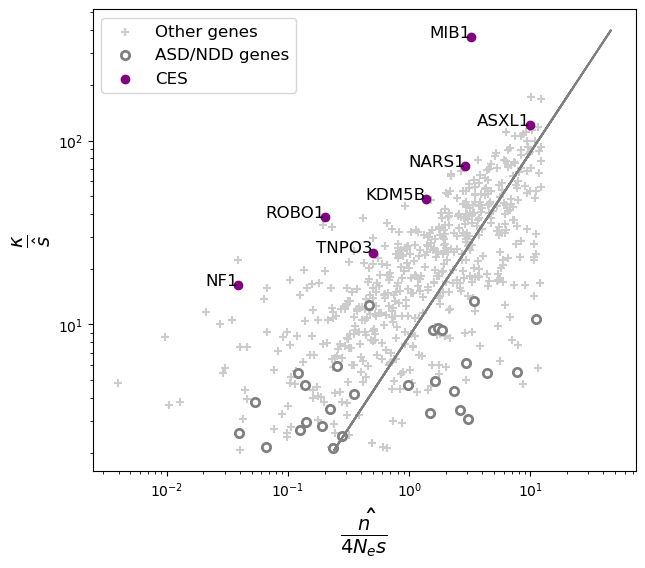

In [19]:
NCE_genes = [
    'ENSG00000095787', 'ENSG00000156650', 'ENSG00000108001', 'ENSG00000110066', 
    'ENSG00000118058', 'ENSG00000167548', 'ENSG00000123066', 'ENSG00000100888', 
    'ENSG00000173575', 'ENSG00000080603', 'ENSG00000167522', 'ENSG00000108883', 
    'ENSG00000141431', 'ENSG00000196628', 'ENSG00000143442', 'ENSG00000143614', 
    'ENSG00000153187', 'ENSG00000101126', 'ENSG00000100393', 'ENSG00000251322', 
    'ENSG00000136531', 'ENSG00000119042', 'ENSG00000168137', 'ENSG00000114861', 
    'ENSG00000197283', 'ENSG00000158321', 'ENSG00000083168', 'ENSG00000171316', 
    'ENSG00000136854', 'ENSG00000181090', 'ENSG00000132535', 'ENSG00000169554', 
    'ENSG00000126705', 'ENSG00000146872', 'ENSG00000198218', 'ENSG00000169184', 
    'ENSG00000198824', 'ENSG00000141367', 'ENSG00000120071', 'ENSG00000134532', 
    'ENSG00000100207', 'ENSG00000179456', 'ENSG00000081189', 'ENSG00000165671', 
    'ENSG00000164134', 'ENSG00000005339', 'ENSG00000189079', 'ENSG00000152217', 
    'ENSG00000010818', 'ENSG00000153827', 'ENSG00000179950', 'ENSG00000186487', 
    'ENSG00000162923', 'ENSG00000185920', 'ENSG00000132510', 'ENSG00000169375', 
    'ENSG00000055208', 'ENSG00000117394', 'ENSG00000036257', 'ENSG00000188994', 
    'ENSG00000065526', 'ENSG00000109118', 'ENSG00000166147', 'ENSG00000055609', 
    'ENSG00000119866', 'ENSG00000204406', 'ENSG00000157103', 'ENSG00000162599', 
    'ENSG00000128573', 'ENSG00000117713', 'ENSG00000116539', 'ENSG00000135316', 
    'ENSG00000151623', 'ENSG00000100354', 'ENSG00000160551', 'ENSG00000156983', 
    'ENSG00000134138', 'ENSG00000197170', 'ENSG00000109685', 'ENSG00000102974', 
    'ENSG00000135365', 'ENSG00000145362', 'ENSG00000181827', 'ENSG00000163625', 
    'ENSG00000079432', 'ENSG00000108510', 'ENSG00000058404', 'ENSG00000108175', 
    'ENSG00000100146', 'ENSG00000148400', 'ENSG00000103197', 'ENSG00000165699', 
    'ENSG00000080298', 'ENSG00000151067', 'ENSG00000167978', 'ENSG00000121297', 
    'ENSG00000163848', 'ENSG00000166747', 'ENSG00000143621', 'ENSG00000198561', 
    'ENSG00000139613', 'ENSG00000177565', 'ENSG00000272333', 'ENSG00000101489', 
    'ENSG00000121741', 'ENSG00000171735', 'ENSG00000106689', 'ENSG00000174672', 
    'ENSG00000114742', 'ENSG00000015171', 'ENSG00000278311', 'ENSG00000147862', 
    'ENSG00000162105', 'ENSG00000072518', 'ENSG00000146247', 'ENSG00000009307', 
    'ENSG00000144285', 'ENSG00000130940', 'ENSG00000170921', 'ENSG00000134323', 
    'ENSG00000152977', 'ENSG00000122482', 'ENSG00000119335', 'ENSG00000119669', 
    'ENSG00000135387', 'ENSG00000151150'
]

def plot_vecs(vec1, vec2, gdf):
    
    plt.scatter(vec1[~gdf["CES_bool"]], vec2[~gdf["CES_bool"]], color="#CCCCCC", marker="+", label="Other genes")
    plt.scatter(vec1[gdf["ENS_ID"].isin(NCE_genes)], vec2[gdf["ENS_ID"].isin(NCE_genes)], 
                facecolors='white', linewidth=2, edgecolors='#808080', label="ASD/NDD genes")
    plt.scatter(vec1[gdf["CES_bool"]], vec2[gdf["CES_bool"]], color="purple", label="CES")

    # Annotate CES genes
    for x, y, name in zip(vec1[gdf["CES_bool"]], vec2[gdf["CES_bool"]], gdf[gdf["CES_bool"]]["Gene_ID"]):
        plt.text(x, y, name, fontsize=12, ha='right')

    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$\frac{\kappa}{\hat{s}}$", fontsize=20)
    plt.xlabel(r"$\hat{\frac{n}{4N_e s}}$", fontsize=20)
    plt.legend(fontsize=12)
    plt.savefig("Fig2b_raw.pdf")
    plt.show()

# Filter and transform data
gdf3 = gdf2[(gdf2["v1"] > 0.0025) & (gdf2["v1"] < 0.5)]
gdf3 = gdf3[gdf3["v2"] - 1 > 0]

l_v2 = np.log10(gdf3["v2"] - 1)
l_v1 = np.log10(1 / gdf3["v1"])

gdf3 = gdf3[l_v2 < 1.1]
intercept = np.mean(l_v2) - np.mean(l_v1)
regression_line = l_v1 + intercept

# Plot data
plt.figure(figsize=(7, 6))
plt.plot(np.power(10, l_v1 + intercept), np.power(10, l_v1), color="grey")
plot_vecs(gdf3["v2"] - 1, 1 / gdf3["v1"], gdf3)

